# Homework 5: Neural Networks, Predicting Customer Churn
## Rob Taylor, Collaborating with Sharon Lynch Grey
### AI 240 Programming Machine Learning
*Problem* -  Design and develop a Machine learning model for ANN based customer Churn Prediction using simple neural network.

Churn prediction is the process of forecasting which customers are likely to discontinue using a service or subscription. It's essentially identifying customers at risk of leaving, allowing businesses to take proactive steps to retain them. This is a critical aspect of business strategy, especially for subscription-based models, as retaining existing customers is often more cost-effective than acquiring new ones.

*Dataset*  - Kaggle Churn dataset
Each row represents a customer, each column contains customer’s attributes.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
The steps in this notebook should include:

Data Exploration: Understanding the dataset and key features.
Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
Modeling: Implementing and evaluating machine learning model.
Evaluation: Evaluate the performance of the model.

The steps in this notebook should include:

* Data Exploration: Understanding the dataset and key features.
* Data Preprocessing: Cleaning the data, handling missing values, and normalizing features.
* Modeling: Implementing and evaluating machine learning model - Neural Networks using Tensorflow keras
* Evaluation: Evaluate the performance of the model.

# Setup

In [3]:
### Done one time and then commented out:
#!pip install tensorflow

In [4]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Training tools for Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [6]:
# Modeling Tools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input # using this style to avoid the warnings
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
# Evaluation Tools
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_curve, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Get the data from CSV

In [9]:
# load into datafram
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Data Exploration
Understanding the dataset and key features.
Load, Describe, Find Info, Top/Bot 5 rows, list any key features
Plot bar chart, Distribution Chart, Heat Maps


In [11]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.shape

(7043, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# Is that right? I'm a little confused... 
# Ensure it's numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for nulls
print("Missing TotalCharges:", df['TotalCharges'].isna().sum())

#So there are some missing values

# Optional: drop or fill missing
df = df.dropna(subset=['TotalCharges'])
print(df['TotalCharges'].describe())

# a STD of 2000?

Missing TotalCharges: 11
count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64


In [16]:
# Ensure it's numeric
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [17]:
# Check for nulls
print("Missing MonthlyCharges:", df['MonthlyCharges'].isna().sum())

#So there are no missing values

# Optional: drop or fill missing
df = df.dropna(subset=['MonthlyCharges'])
print(df['MonthlyCharges'].describe())

Missing MonthlyCharges: 0
count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64


In [18]:
# Check for inconsistent data.
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

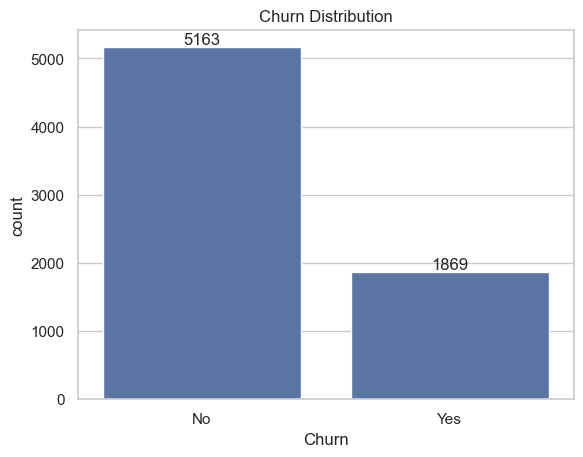

In [19]:
# Bar chart for the target variable
sns.set(style="whitegrid")

# Just a Count plot with labeled bars
ax = sns.countplot(data=df, x='Churn')

ax.bar_label(ax.containers[0])  # Access the first container in the list

plt.title("Churn Distribution")
plt.show()

## Thoughts
Overall, the data is skewed toward no churn. Which means, we may need to be careful to not overpredict "No" when considering a potential Churn. 

Also, describe is only going to be able to give us information on numeric data. May need to do more here.

In [21]:
# This seems like the long way of figuring this out. Let's try a loop:
for col in df.columns:
    print(f"\nColumn: {col} — {df[col].nunique()} unique values")
    print(df[col].value_counts())



Column: customerID — 7032 unique values
customerID
7590-VHVEG    1
0265-PSUAE    1
2956-GGUCQ    1
6008-NAIXK    1
5956-YHHRX    1
             ..
7874-ECPQJ    1
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
3186-AJIEK    1
Name: count, Length: 7032, dtype: int64

Column: gender — 2 unique values
gender
Male      3549
Female    3483
Name: count, dtype: int64

Column: SeniorCitizen — 2 unique values
SeniorCitizen
0    5890
1    1142
Name: count, dtype: int64

Column: Partner — 2 unique values
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Column: Dependents — 2 unique values
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Column: tenure — 72 unique values
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: count, Length: 72, dtype: int64

Column: PhoneService — 2 unique values
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Column: MultipleLines — 3 unique values
Multiple

### Now that is useful information 

## Plots

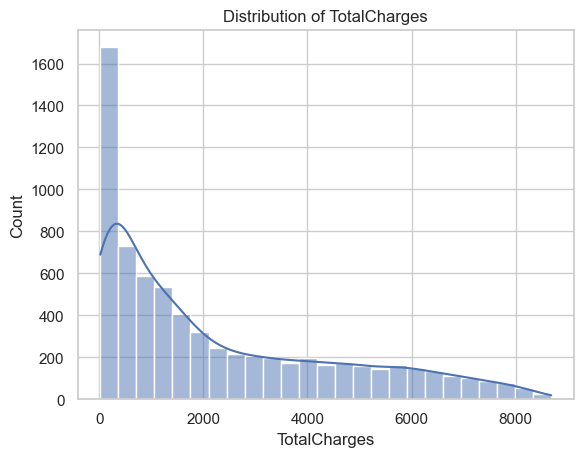

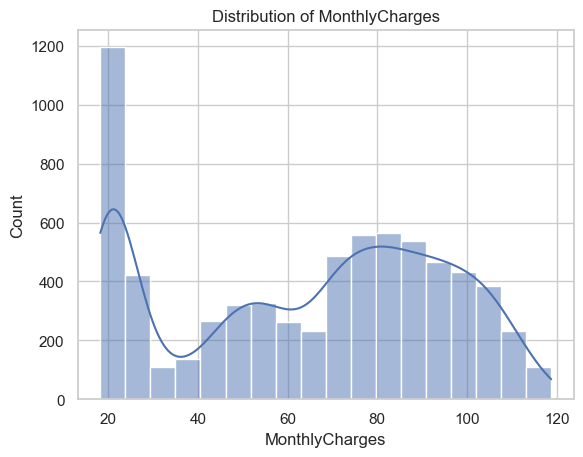

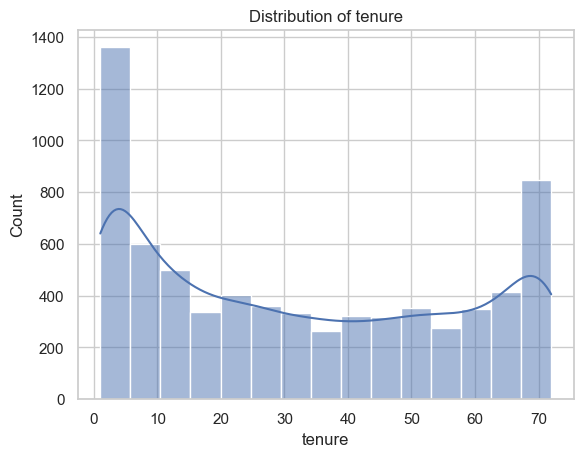

In [24]:
# Distribution plots for numerical features
num_cols = ['TotalCharges', 'MonthlyCharges', 'tenure']

# why is house number even in here?? 
for col in num_cols:
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

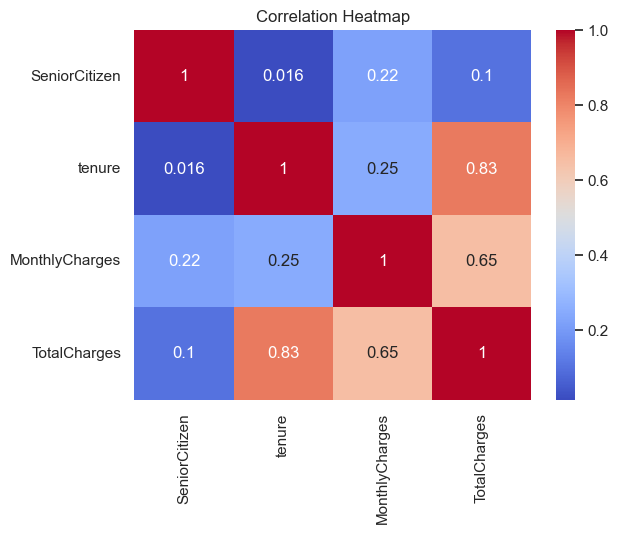

In [25]:
# Heatmap 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm') 
plt.title('Correlation Heatmap')
plt.show()


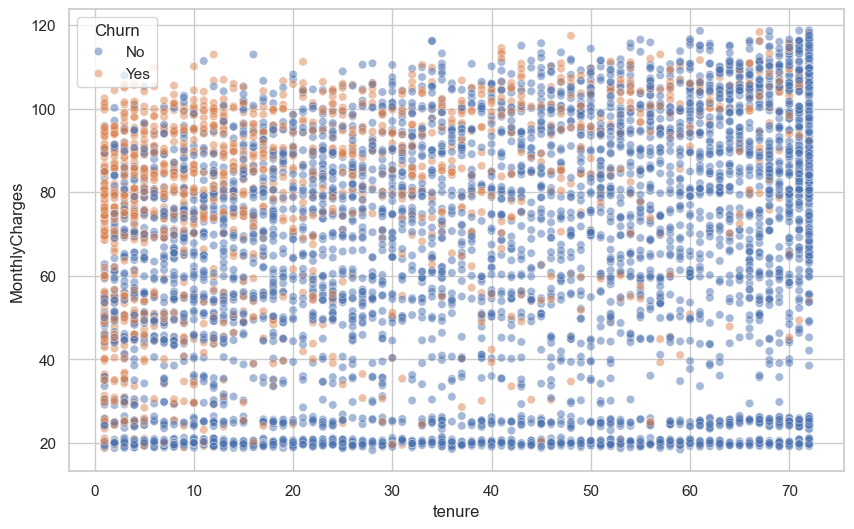

In [26]:
# Let's plot Monthly Charges 

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges',hue='Churn', data=df, alpha=0.5)
#plt.yticks([]) 
plt.show()

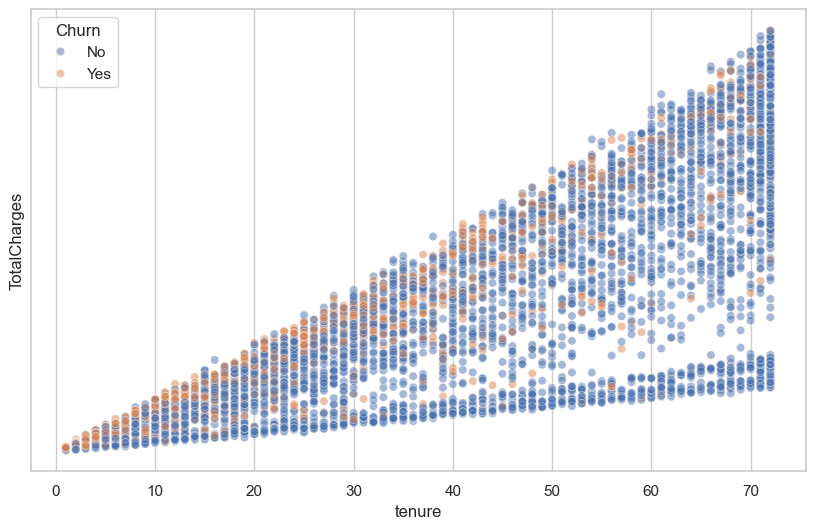

In [27]:
# Playing with TotalCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='TotalCharges',hue='Churn', data=df, alpha=0.5)
plt.yticks([]) 
plt.show()

# Data PreProcessing
Cleaning the data, handling missing values, and normalizing features.
Use standard scalar

In [29]:
# Get rid of any NA values (In looking at the data, it didn't seem like there were but still...)
df = df.dropna()

## Try to make Python figure out the Yes No Columns and limited response columns

In [31]:
binary_cols = [col for col in df.columns if set(df[col].unique()) <= {'Yes', 'No', 'No internet service', 'No phone service'}]
print("Columns with only 'Yes' and 'No':", binary_cols)


Columns with only 'Yes' and 'No': ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']


In [32]:
# Convert string labels to binary (apparently really good for Neural Networks)
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': 0, 'No phone service': 0})

print(df.shape)

(7032, 21)


In [33]:
# Just looking at the result sets
df[df['Churn'] == 1].describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0
mean,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,0.749064,74.441332,1531.796094,1.0
std,0.435799,0.479524,0.379576,19.531123,0.287626,0.498085,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,0.433668,24.666053,1890.822994,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.850000,18.850000,1.0
25%,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.150000,134.500000,1.0
50%,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,79.650000,703.550000,1.0
75%,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,94.200000,2331.300000,1.0
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.350000,8684.800000,1.0


In [34]:
# So, I'm comparing against the NO as well...
df[df['Churn'] == 0].describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,5163.000000,5163.000000,5163.000000,5163.00000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.000000,5163.0
mean,0.128995,0.527600,0.343405,37.65001,0.901220,0.410033,0.333140,0.368390,0.362774,0.335077,0.365873,0.370521,0.536122,61.307408,2555.344141,0.0
std,0.335227,0.499286,0.474891,24.07694,0.298395,0.491887,0.471382,0.482415,0.480847,0.472063,0.481721,0.482991,0.498742,31.094557,2329.456984,0.0
min,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.0
25%,0.000000,0.000000,0.000000,15.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.100000,577.825000,0.0
50%,0.000000,1.000000,0.000000,38.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,64.450000,1683.600000,0.0
75%,0.000000,1.000000,1.000000,61.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88.475000,4264.125000,0.0
max,1.000000,1.000000,1.000000,72.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8672.450000,0.0


### OK - some have multiple labels - these can also be converted to binary - which will change the shape of everything.

In [36]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
print(df.shape)

(7032, 25)


In [37]:
# OK - now what does it look like?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   object 
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

In [38]:
# Looks like gender is my final holdout:
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})


In [39]:
# And I meant for the bool to be int
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [40]:
# just making sure now:
df.isnull().sum()

customerID                               0
gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMeth

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int64  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   int64  
 6   PhoneService                           7032 non-null   int64  
 7   MultipleLines                          7032 non-null   int64  
 8   OnlineSecurity                         7032 non-null   int64  
 9   OnlineBackup                           7032 non-null   int64  
 10  DeviceProtection                       7032 non-null   int64  
 11  TechSuppo

In [42]:
# I think keeping customerID would only mess with the results. It needs to be dropped. Now is a good time to 
# Separate features from the target variable (Churn is the dependent variable)
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']


In [43]:
# Some testing to make sure I didn't leave the result set in there:
print(df.columns)
print(X.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'P

In [44]:
# Normalize features
X.info()
y.info()
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Streaming

## Normalize the number columns

In [46]:
# Columns to scale 
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print(X[num_cols].describe())

            tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean      0.442560        0.463166      0.261309
std       0.345708        0.299363      0.261571
min       0.000000        0.000000      0.000000
25%       0.112676        0.172512      0.044155
50%       0.394366        0.518408      0.159090
75%       0.760563        0.712562      0.435719
max       1.000000        1.000000      1.000000


# Modeling using Neural Network
Implementing and evaluating machine learning model
Feed the model, predict with the test data set

In [48]:
# Split data (80% training, 20% testing) using the ultimate question of life, the universe and everything
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [50]:
X.shape

(7032, 23)

In [51]:
# Create and train the model 
model = Sequential([                   # From Tensorflow
    ### add the layers
    Input(shape=(X_train.shape[1],)),    # Using the shape from X_train 
    Dense(32, activation='relu'),      # in 1st Hiddne layer
    Dropout(0.3),                      # Dropout to 1st layer's output to help prevent overfitting 
    Dense(16, activation='relu'),      # 2nd hidden layer
    Dense(1, activation='sigmoid')     # Output layer 
])

## compile the model
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, epochs=75, verbose=1)

Epoch 1/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7112 - loss: 0.5591 - val_accuracy: 0.7875 - val_loss: 0.4480
Epoch 2/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7956 - loss: 0.4384 - val_accuracy: 0.7896 - val_loss: 0.4383
Epoch 3/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7835 - loss: 0.4423 - val_accuracy: 0.7918 - val_loss: 0.4388
Epoch 4/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7834 - loss: 0.4365 - val_accuracy: 0.7953 - val_loss: 0.4345
Epoch 5/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7882 - loss: 0.4279 - val_accuracy: 0.7939 - val_loss: 0.4345
Epoch 6/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7914 - loss: 0.4385 - val_accuracy: 0.7960 - val_loss: 0.4326
Epoch 7/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7999 - loss: 0.4263 - val_accuracy: 0.7967 - val_loss: 0.4325
Epoch 8/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8075 - loss: 0.4193 - val_accuracy: 0.

In [52]:
# Create the predictions
y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=-1)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [53]:
accuracy_score(y_test,y_pred)

0.7341862117981521

# Evaluation
Evaluate the model 
Which performance steps are applicable

In [55]:
# Apparently this is built into the keras model:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Keras Test Accuracy: {accuracy:.3f}")

# But we can figure out the stats ourselves (like from the breast cancer sammple)
y_probs = model.predict(X_test)
y_pred = (y_probs > 0.5).astype("int32") # Need to convert to binary predictions

# Calculated accuracy - which we can use for the confusion matrix
print(f"Calculated Accuracy Score: {accuracy_score(y_test, y_pred):.3f}")


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7877 - loss: 0.4360 
Keras Test Accuracy: 0.792
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step
Calculated Accuracy Score: 0.792


In [56]:
# Let's build a Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [57]:
print(cnf_matrix)

[[907 126]
 [167 207]]


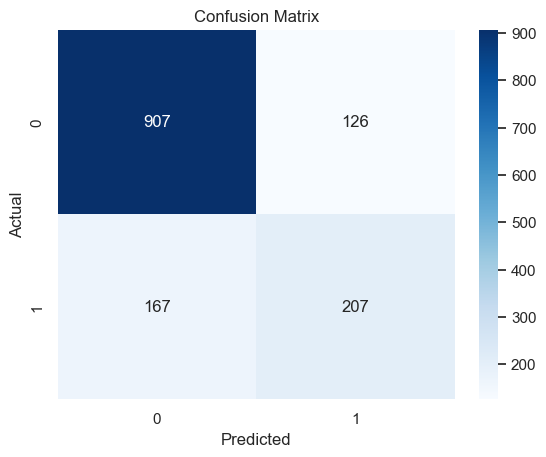

In [58]:
# Confusion matrix heatmap
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [59]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))



Classification Report:
              precision    recall  f1-score   support

    No Churn       0.84      0.88      0.86      1033
       Churn       0.62      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [60]:
# Let's do some calculations (skylearn):
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_probs)

print(f"# Correct/Total, Accuracy: {accuracy:.2f}")
print(f"# Correct of the predicted values, Precision: {precision:.2f}")
print(f"# Correct of the actual positives, Recall: {recall:.2f}")
print(f"Harmonic mean of precision and recall, F1 Score: {f1:.2f}")
print(f"Imbalance ROC AUC Score: {roc_auc_score:.2f}")

# Correct/Total, Accuracy: 0.79
# Correct of the predicted values, Precision: 0.62
# Correct of the actual positives, Recall: 0.55
Harmonic mean of precision and recall, F1 Score: 0.59
Imbalance ROC AUC Score: 0.83


In [61]:
# Classification report (skylearn)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.55      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



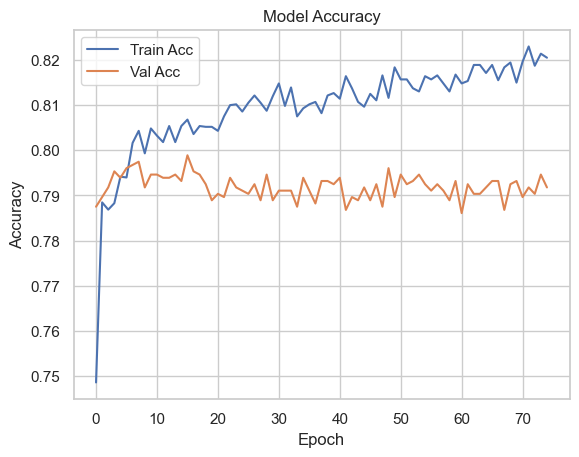

In [62]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


### What am I seeing?
SO, the training data seems to get better and better, but the testing data seems to get worse (not by much, but the divergence is becoming apparent)

So, <b>This seems like overfitting.</b> 

In [65]:
# Compare feature averages by class
df.groupby('Churn').mean(numeric_only=True)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
Churn,,,,,,,,,,,,,,,,,,,,,
0,0.507263,0.128995,0.527600,0.343405,37.650010,0.901220,0.410033,0.333140,0.368390,0.362774,...,0.536122,61.307408,2555.344141,0.348441,0.272516,0.252954,0.317064,0.249661,0.250629,0.251017
1,0.497592,0.254682,0.357945,0.174425,17.979133,0.909042,0.454789,0.157838,0.279829,0.291600,...,0.749064,74.441332,1531.796094,0.693954,0.060460,0.088818,0.025682,0.124131,0.573034,0.164794


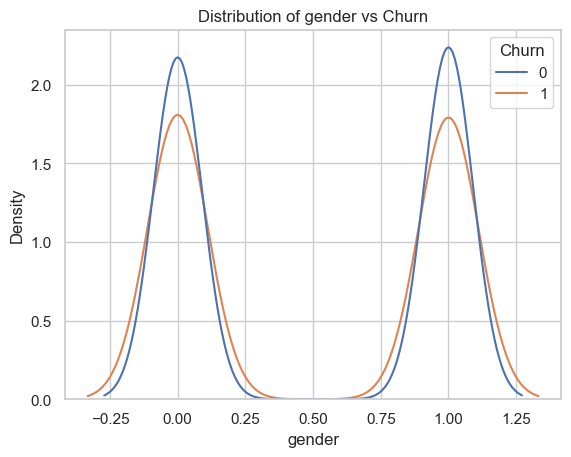

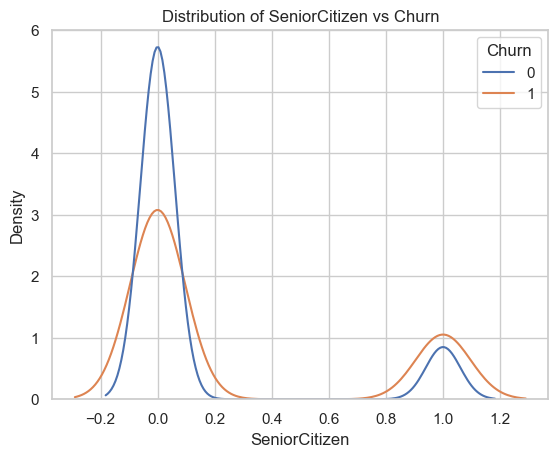

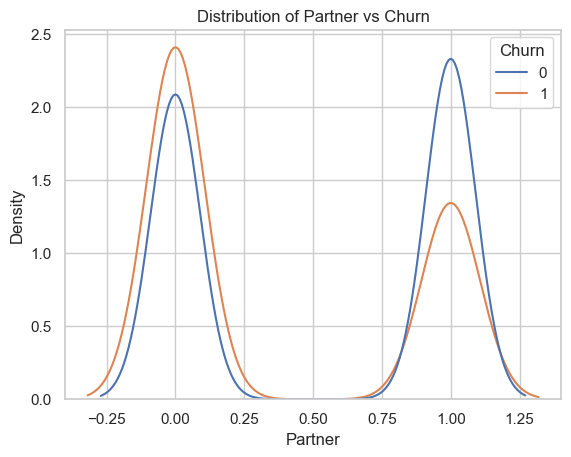

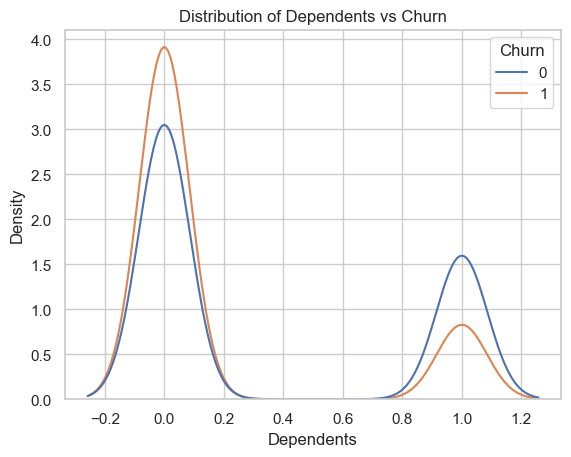

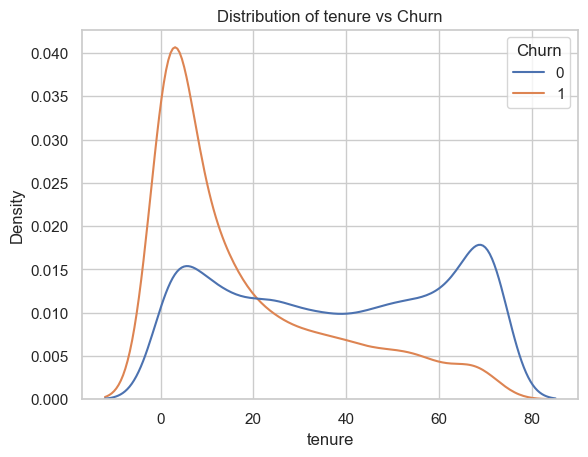

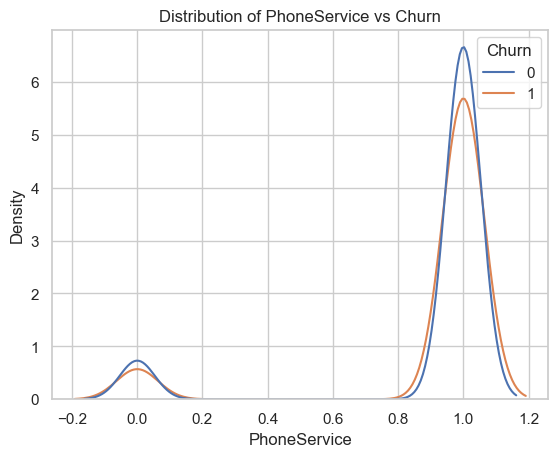

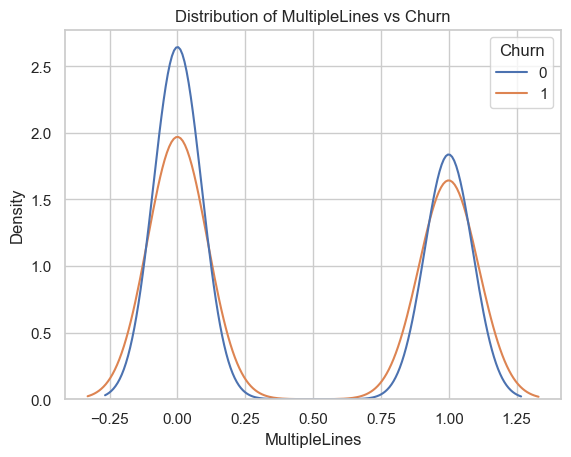

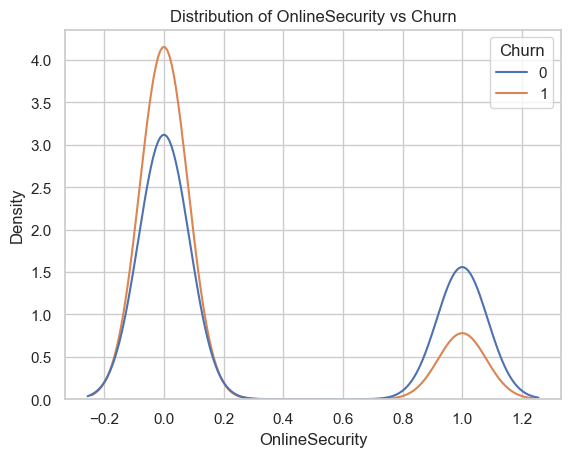

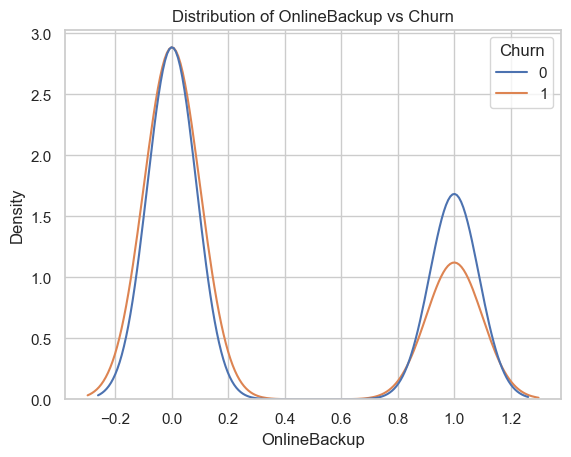

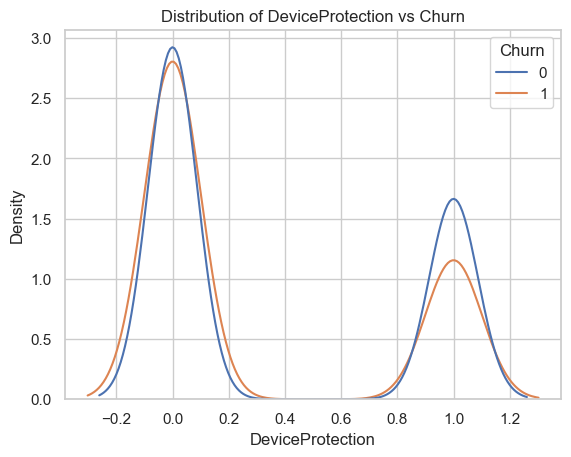

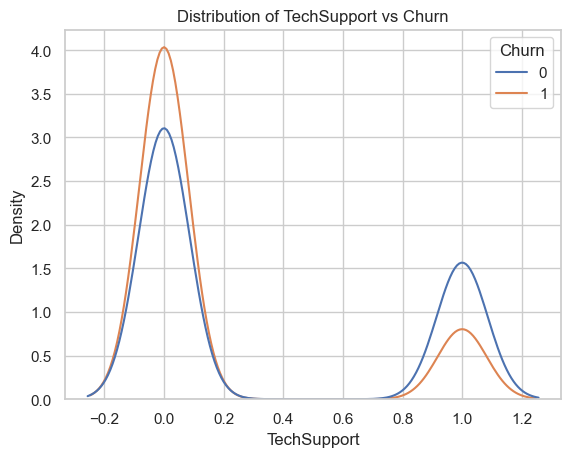

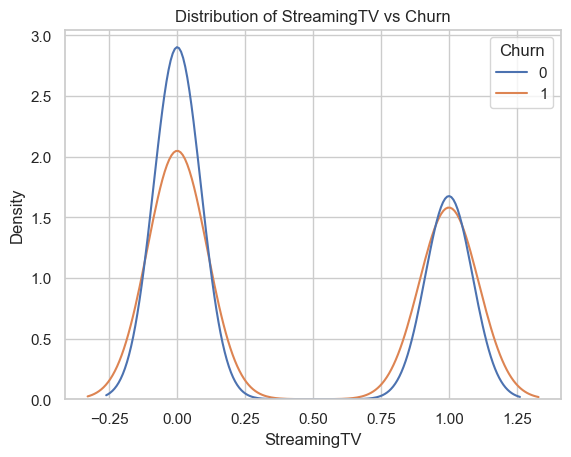

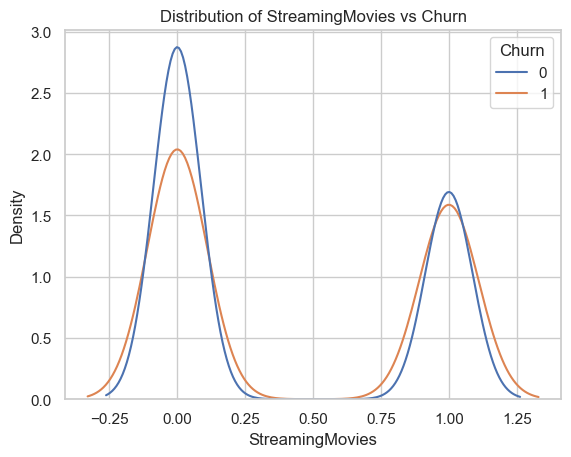

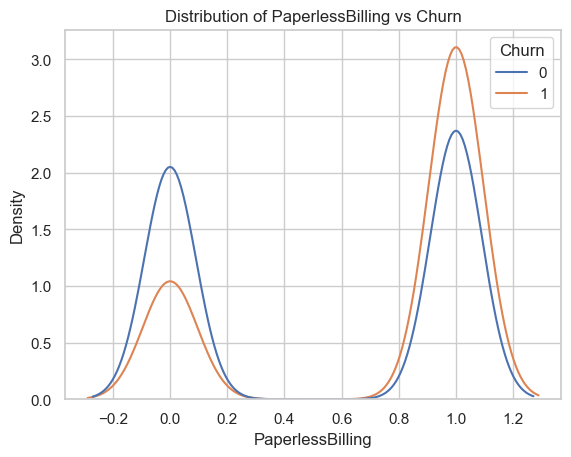

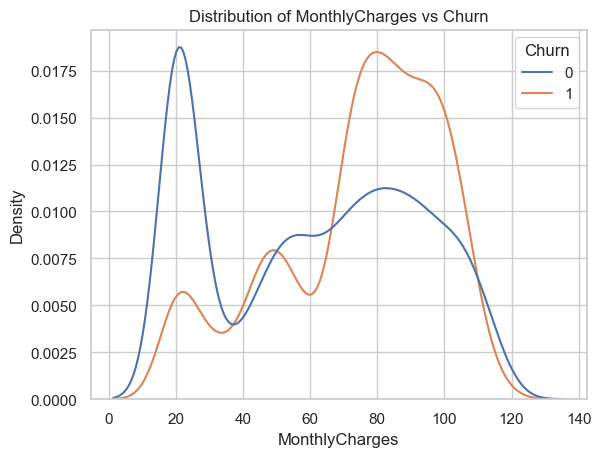

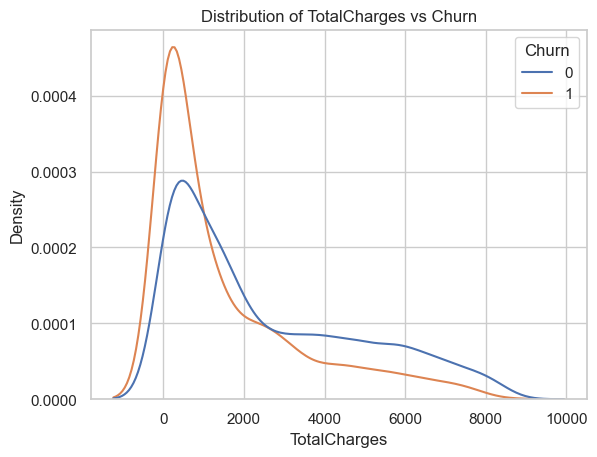

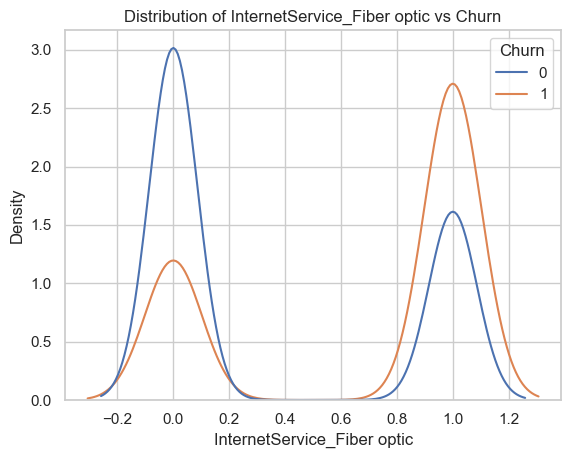

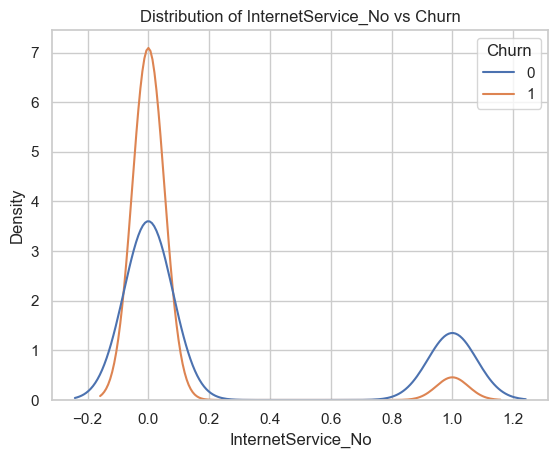

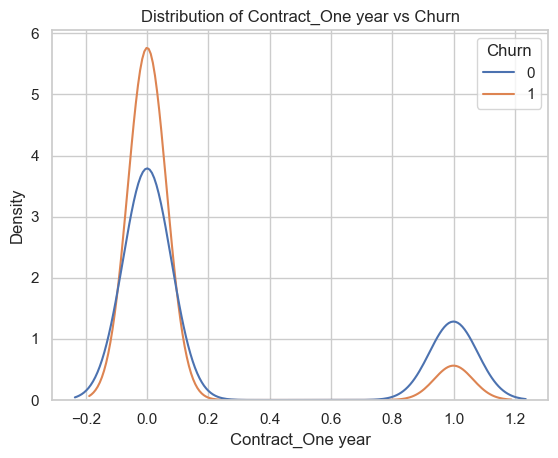

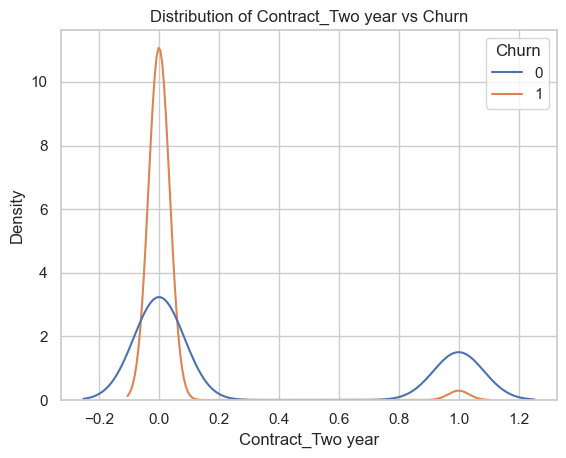

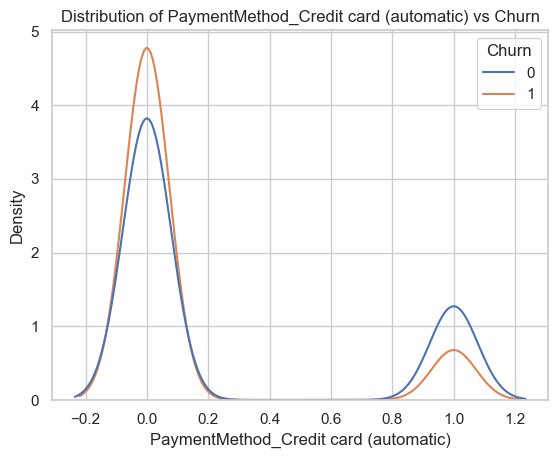

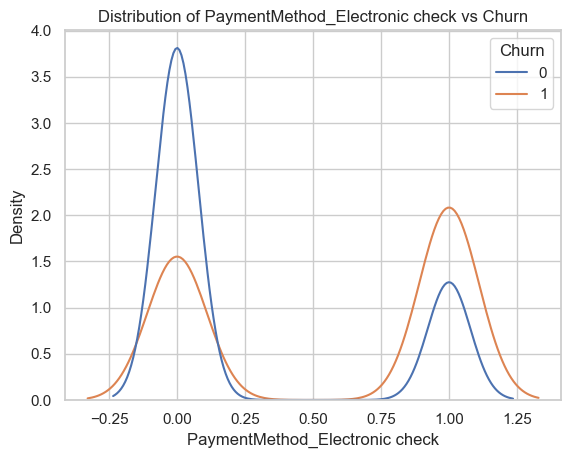

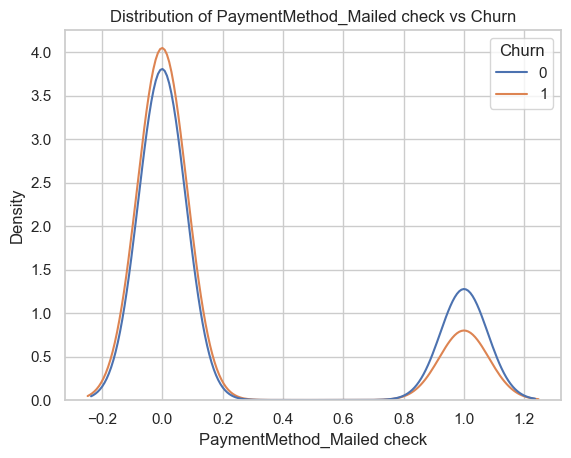

In [66]:
for col in X.columns:
    sns.kdeplot(data=df, x=col, hue='Churn', common_norm=False)
    plt.title(f'Distribution of {col} vs Churn')
    plt.show()

### Seeing if we can improve on this. Trying the pyramid method

In [68]:
# Create and train the model again
model2 = Sequential([                   # From Tensorflow
    ### add the layers
    Input(shape=(X_train.shape[1],)),    # Using the shape from X_train 
    Dense(16, activation='relu'),      # in 1st Hiddne layer
    Dropout(0.3),                      # Dropout to 1st layer's output to help prevent overfitting 
    Dense(32, activation='relu'),      # in 2nd Hidden layer (pyramid method)
    Dropout(0.3),                      # Dropout to 1st layer's output to help prevent overfitting 
    Dense(16, activation='relu'),      # 3rd hidden layer
    Dense(1, activation='sigmoid')     # Output layer 
])

## compile the model
model2.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

history = model2.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, epochs=75, verbose=1)

Epoch 1/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7407 - loss: 0.5485 - val_accuracy: 0.7441 - val_loss: 0.4568
Epoch 2/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7626 - loss: 0.4571 - val_accuracy: 0.7939 - val_loss: 0.4539
Epoch 3/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7625 - loss: 0.4649 - val_accuracy: 0.7953 - val_loss: 0.4392
Epoch 4/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4355 - val_accuracy: 0.7953 - val_loss: 0.4373
Epoch 5/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.4331 - val_accuracy: 0.7918 - val_loss: 0.4360
Epoch 6/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7943 - loss: 0.4409 - val_accuracy: 0.7960 - val_loss: 0.4357
Epoch 7/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7832 - loss: 0.4431 - val_accuracy: 0.7953 - val_loss: 0.4330
Epoch 8/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7968 - loss: 0.4326 - val_accuracy: 0.

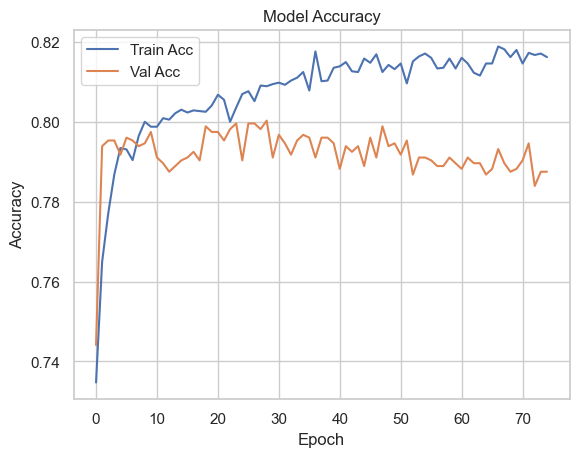

In [69]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


### Looks worse. Trying higher first and progressively less
Sometimes when I run this method, it helps. Other times it is worse. Even still, the change isn't that significant.

In [71]:
# Create and train the model again
model3 = Sequential([                   # From Tensorflow
    ### add the layers
    Input(shape=(X_train.shape[1],)),    # Using the shape from X_train 
    Dense(64, activation='relu'),      # in 1st Hiddne layer
    Dropout(0.3),                      # Dropout to 1st layer's output to help prevent overfitting 
    Dense(32, activation='relu'),      # in 2nd Hidden layer
    Dropout(0.3),                      # Dropout to 1st layer's output to help prevent overfitting 
    Dense(16, activation='relu'),      # 3rd hidden layer
    Dense(1, activation='sigmoid')     # Output layer 
])

## compile the model
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

history = model3.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=32, epochs=75, verbose=1)

Epoch 1/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6893 - loss: 0.5794 - val_accuracy: 0.7889 - val_loss: 0.4442
Epoch 2/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.4509 - val_accuracy: 0.7925 - val_loss: 0.4394
Epoch 3/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7865 - loss: 0.4387 - val_accuracy: 0.7918 - val_loss: 0.4363
Epoch 4/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7910 - loss: 0.4384 - val_accuracy: 0.7903 - val_loss: 0.4349
Epoch 5/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7927 - loss: 0.4379 - val_accuracy: 0.7974 - val_loss: 0.4337
Epoch 6/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8006 - loss: 0.4205 - val_accuracy: 0.7946 - val_loss: 0.4306
Epoch 7/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7938 - loss: 0.4245 - val_accuracy: 0.7932 - val_loss: 0.4316
Epoch 8/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7922 - loss: 0.4298 - val_accuracy: 0.

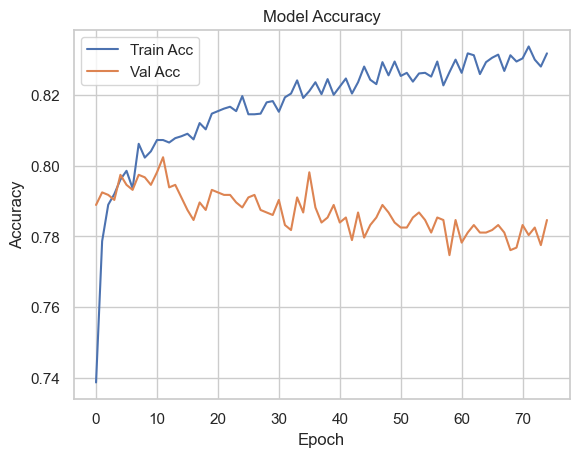

In [72]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


### Clearly I'm going the wrong way!

In [74]:
# Create and train the model using the ultimate question of life, the universe and everything

## After this many failures, I'm going to try early stopping on the model that seemed to work the best

# Set up EarlyStopping
early_stop = EarlyStopping(
    monitor='val_accuracy',      # Watch validation accuracy
    patience=5,                  # Stop after 5 epochs without improvement
    restore_best_weights=True    # Restore the best weights
)

# try again
# Create and train the model using the ultimate question of life, the universe and everything
model4 = Sequential([                   # From Tensorflow
                                        ### add the layers
    Input(shape=(X_train.shape[1],)),   # Using the shape from X_train 
    Dense(32, activation='relu'),       # in 1st Hiddne layer
    Dropout(0.3),                       # Dropout to 1st layer's output to help prevent overfitting 
    Dense(16, activation='relu'),       # 2nd hidden layer
    Dense(1, activation='sigmoid')      # Output layer 
])

## compile the model
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train with EarlyStopping
history = model4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=32,
    epochs=75,
    verbose=1,
    callbacks=[early_stop]   # EARLY EXIT IF THINGS ARE GETTING WORSE!! 
)


Epoch 1/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6646 - loss: 0.5981 - val_accuracy: 0.7740 - val_loss: 0.4522
Epoch 2/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7887 - loss: 0.4495 - val_accuracy: 0.7918 - val_loss: 0.4389
Epoch 3/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.4344 - val_accuracy: 0.7960 - val_loss: 0.4349
Epoch 4/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4312 - val_accuracy: 0.7939 - val_loss: 0.4325
Epoch 5/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7908 - loss: 0.4356 - val_accuracy: 0.7974 - val_loss: 0.4351
Epoch 6/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8045 - loss: 0.4197 - val_accuracy: 0.7953 - val_loss: 0.4318
Epoch 7/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8093 - loss: 0.4201 - val_accuracy: 0.7967 - val_loss: 0.4299
Epoch 8/75
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8032 - loss: 0.4209 - val_accuracy: 0.

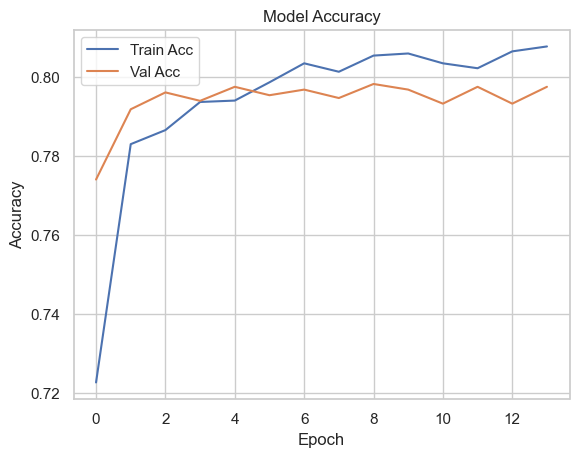

In [75]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()


### So - after just 6-12 epochs the model quit
This seems interesting to me in that the training continues to get better but the test data starts to get worse.

### Did we improve?


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7925 - loss: 0.4263
Keras Test Accuracy: 0.798
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Calculated Accuracy Score: 0.798


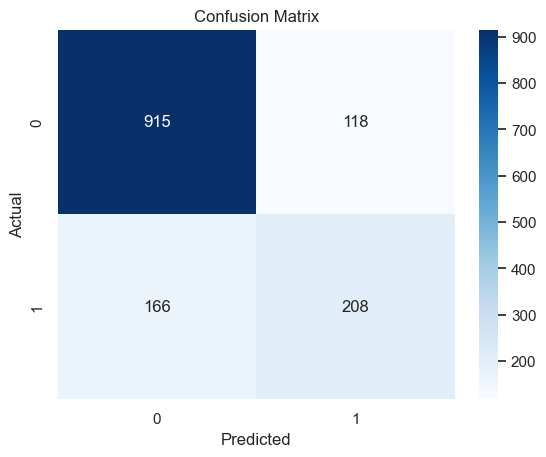


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.85      0.89      0.87      1033
       Churn       0.64      0.56      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.64      0.56      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



In [77]:
# Apparently this is built into the keras model:
loss, accuracy = model4.evaluate(X_test, y_test)
print(f"Keras Test Accuracy: {accuracy:.3f}")

# But we can figure out the stats ourselves (like from the breast cancer sammple)
y_probs = model4.predict(X_test)
y_pred = (y_probs > 0.5).astype("int32") # Need to convert to binary predictions

# Calculated accuracy - which we can use for the confusion matrix
print(f"Calculated Accuracy Score: {accuracy_score(y_test, y_pred):.3f}")



# Let's build a Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix



# Confusion matrix heatmap
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))



# Classification report (skylearn)
print(classification_report(y_test, y_pred))

### Well, all the efforts make is more or less the same... 
Yes it is slightly better. I ran the models multiple times and sometimes this quits after 6 runs, other times 12 times. Overall, It doesn't seem I was able to improve on the original model very much. It is so close, all the effort didn't seem to be worth it. And if you run it again, it may or may not get better.